# Worksheet 15

Due Tuesday night (instead of the usual Monday due date), because of the Memorial Day holiday.

The goal of this worksheet is to use a Decision Tree classifier to predict whether or not a passenger of the Titanic survived.

Many of the ideas in this worksheet come from [this notebook](https://www.kaggle.com/code/zlatankr/titanic-random-forest-82-78) on Kaggle by [ZlatanKremonic](https://www.kaggle.com/zlatankr).  The dataset we use comes from a [Kaggle competition](https://www.kaggle.com/competitions/titanic).

In [1]:
import pandas as pd

## Feature Engineering

A few useful columns in this DataFrame are not directly useable as they are, for example because they include missing values or because they are non-numeric.  By "Feature Engineering", we mean adding new columns (or adjusting existing columns) that can be used by our Machine Learning model.

* Load the attached Titanic dataset.
* Using Boolean indexing, remove the rows where the "Embarked" column value is missing.
* Drop the "PassengerId" column using the `drop` method, with `drop("PassengerId", axis=???)`.  You should probably use the `copy` method to prevent warnings in the next step.
* Check: at this stage, the DataFrame should have `889` rows and `11` columns.

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df = df[df["Embarked"].notna()]

In [4]:
df = df.drop("PassengerId", axis = 1)

In [5]:
df.shape

(889, 11)

* Add a column "AgeNull" which contains `True` if the value in the "Age" column is missing and contains `False` otherwise.  The code to do this is shorter than you might expect: `df["AgeNull"] = df["Age"].isna()`.

In [6]:
df["AgeNull"] = df["Age"].isna()

* Fill in the missing values in the "Age" column with the median value from that column. Use the pandas Series method `fillna`.  (Replace the "Age" column with this new column that does not have any missing values.)

In [7]:
df["Age"]=df["Age"].fillna(df["Age"].median())

* Add a column "IsFemale" which contains `True` if the value in the "Sex" column is `"female"`.  (As with the "AgeNull" column above, you shouldn't need to use `map` or a for loop or anything like that.)

In [8]:
df["isFemale"]= df["Sex"] =="female"

In [9]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeNull,isFemale
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,True
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,True
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False


## Splitting the data with `train_test_split`

* Make a list `features` containing the names of all the numeric columns in the DataFrame except for the "Survived" column.  (Use the function `is_numeric_dtype` from `pandas.api.types`.  To take the "Survived" column out of the list, you might want to use the Python list method `remove`.  Notice that `remove` changes this list *in place*.)

In [10]:
from pandas.api.types import is_numeric_dtype

In [13]:
features = [col for col in df.columns if is_numeric_dtype(df[col].dtype)]

In [15]:
features.remove("Survived")

In [16]:
features

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'AgeNull', 'isFemale']

* Check: there should be 7 column names in the `features` list.

* Divide the data into a training set and a test set using `train_test_split`.  Use the columns named in `features` for the input features.  For the target, use the "Survived" column.  For the size, use `train_size` to specify that we should use 60% of the rows for the training set.  Name the resulting objects `X_train, X_test, y_train, y_test`.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df["Survived"], train_size= .6 )

## Predicting survival using a decision tree

* Instantiate a `DecisionTreeClassifier` object `clf`.  Include restrictions on the complexity of the tree using the keyword arguments `max_leaf_nodes` and/or `max_depth` when you instantiate the classifier.
* Fit the classifier using `X_train` and `y_train`.
* Try to experiment with different values of `max_leaf_nodes` and/or `max_depth` until you have a tree which seems to be performing well (say, over 80% accuracy on the test set, as calculated using `clf.score`) and which does not seem to be drastically overfitting the data (say, the accuracy on the training set should be within 5% of the accuracy on the test set).

**Warning**.  Be sure you are never calling the `fit` method with the test set; you should only use the `predict` method or the `score` method with the test set.

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf = DecisionTreeClassifier(max_leaf_nodes= 5)

In [21]:
clf.fit( X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=5)

In [23]:
clf.score(X_test, y_test)

0.8230337078651685

## Illustrating the decision tree

* Use the following code to visualize how your decision tree is working.  (I don't totally understand how the `figsize=(20,10)` code works... feel free to adjust it if other values work better for your particular tree.)

```
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20,10))
_ = plot_tree(clf, feature_names=clf.feature_names_in_, filled=True)
```

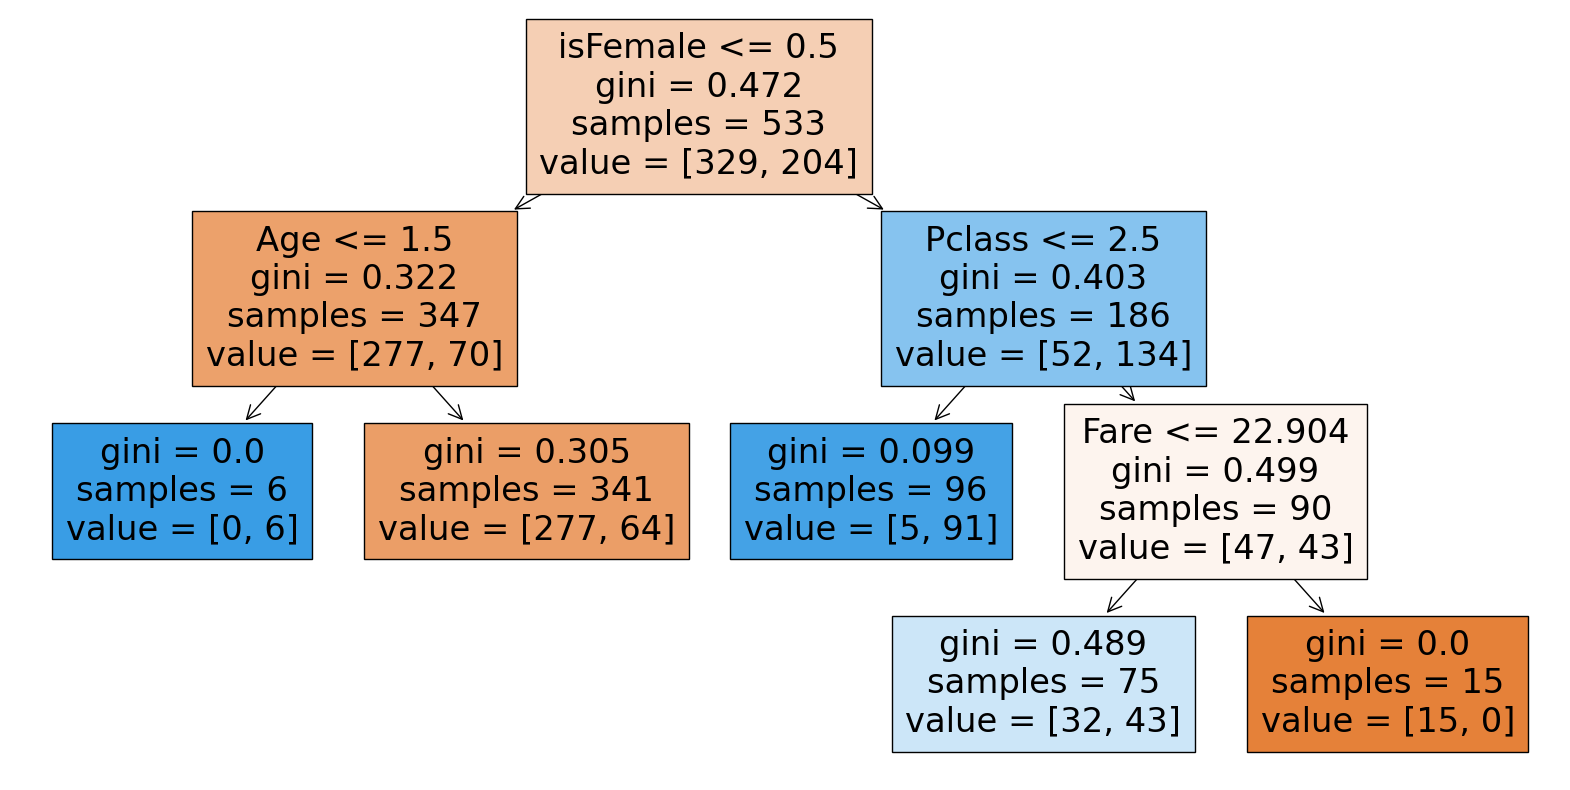

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20,10))
_ = plot_tree(clf, feature_names=clf.feature_names_in_, filled=True)

## The U-shaped test error curve

Our last goal in this worksheet is to reproduce a curve like the following, taken from a [Twitter post](https://twitter.com/daniela_witten/status/1292293102103748609?s=20) by Daniela Witten.  The flexibility axis will correspond to the number of tree leaves.  To make this chart using Altair, we will use a DataFrame with rows for training errors and with additional rows for test errors.

![Test error curve](u-shape-dw.jpeg)

* Make an empty pandas DataFrame `df_err` with three columns named `leaves`, `error` and `set`.

In [59]:
df_err = pd.DataFrame(columns = ["leaves", "error", "set"])

For each integer value `i` from `2` to `40`, inclusive, do the following.  (Use a for loop.  Our overall goal is to have a row for training error and another row for test error.)
* Fit a `DecisionTreeClassifier` with `max_leaf_nodes=i` to the training data.  (Don't put a restriction on the depth of the decision tree.)
* Add a new row to `df_err` containing `i` for the value in the "leaves" column, containing the string `"train"` for the value in the "set" column, and containing the error rate for the value in the "error" column.  (For example, if the `score` on the training data is `0.82`, then you would put `0.18` for the "error" value.)  Suggestion: add this new row by executing `df_err.loc[len(df_err)] = d`, where `d` is an appropriate Python dictionary. 
* Again do the same thing, this time using the error rate on the test set, and using the string `"test"` for the "set" column.

**Warning**.  Be sure you are never fitting a classifier on the test set.

In [60]:
for i in range(2,40) :
    clf2 = DecisionTreeClassifier(max_leaf_nodes= i, random_state= 2)
    clf2.fit(X_train, y_train)
    a = 1 - clf2.score(X_test, y_test)
    b = 1 - clf2.score(X_train, y_train)
    d = {"leaves" : i, "error": a, "set": "test" }
    df_err.loc[len(df_err)] = d
    d = {"leaves" : i, "error": b, "set": "train" }
    df_err.loc[len(df_err)] = d


In [42]:
df_err

,leaves,error,set
0,2,0.191011,test
1,2,0.189493,train
2,3,0.202247,test
3,3,0.189493,train
4,4,0.176966,test
...,...,...,...
71,37,0.189493,train
72,38,0.162921,test
73,38,0.189493,train
74,39,0.157303,test


* Make an Altair line chart `c` using "leaves" for the x-axis, using "error" for the y-axis, and using "set" for the color.  (The result should look approximately like the image above.  The image above is an idealized version of how we would expect the training error and test error curves to look.  Most "real-world" error curves, including yours, will display more randomness and less regularity than the image above.)

In [55]:
import altair as alt


In [61]:
c = alt.Chart(df_err).mark_line().encode(
    x = "leaves",
    y = "error",
    color = "set",
    tooltip = "error"
)

In [62]:
c

alt.Chart(...)

* Can you recognize the approximate "U-shape" in the test error curve?

* What would you estimate is the "sweet spot" for the ideal level of flexibility for this data?  How does it compare to what you chose in the "Predicting survival" section above?

## Reminder

Every group member needs to submit this on Canvas (even if you all submit the same file).

## Submission

* Save the resulting Altair chart as a png file (click the three dots at the upper right of the Altair chart) and submit that png file on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9a763caa-af94-483c-afe6-a65755be54a5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>